# Data Exploration - CICIoT2023 Dataset

Esplorazione del dataset **CICIoT2023** per Network Intrusion Detection System (NIDS).

**Dataset Info:**
- Nome: CICIoT2023
- Source: Canadian Institute for Cybersecurity (CIC)
- Anno: 2023
- Features: 46 features estratte da traffico IoT
- Attacchi: 33 tipi divisi in 7 categorie (DoS, DDoS, Recon, Web-based, Brute Force, Spoofing, Mirai)
- Formato: CSV files
- Link: https://www.unb.ca/cic/datasets/iotdataset-2023.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configura visualizzazione
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
pd.set_option('display.max_columns', 50)

## 1. Caricamento Dataset

Il dataset CICIoT2023 è distribuito in più file CSV (part-*.csv). Per questa esplorazione iniziale, carichiamo un campione rappresentativo.

In [2]:
# NOTA: Modificare questo path con il path reale dei vostri dati
# Il dataset può essere scaricato da:
# - https://www.unb.ca/cic/datasets/iotdataset-2023.html
# - https://www.kaggle.com/datasets/himadri07/ciciot2023

# Esempio: se avete estratto il dataset in data/raw/CICIoT2023/
DATA_PATH = '../data/raw/CICIOT23/train/'

# Carichiamo il primo file come esempio
# (Il dataset completo ha ~46 milioni di record, quindi useremo un sample)
try:
    # Prova a caricare un file CSV
    import glob
    csv_files = glob.glob(f'{DATA_PATH}/*.csv')
    
    if csv_files:
        print(f"Trovati {len(csv_files)} file CSV")
        print(f"Carico il primo file: {csv_files[0]}")
        
        # Carica un sample per esplorazione (prime 100k righe)
        df = pd.read_csv(csv_files[0], nrows=100000)
        print(f"\nShape: {df.shape}")
        print(f"Memoria utilizzata: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    else:
        print("Nessun file CSV trovato. Scarica il dataset da:")
        print("https://www.kaggle.com/datasets/himadri07/ciciot2023")
        # Crea un dataframe dummy per permettere l'esecuzione del notebook
        df = pd.DataFrame()
        
except Exception as e:
    print(f"Errore nel caricamento: {e}")
    df = pd.DataFrame()

Trovati 1 file CSV
Carico il primo file: ../data/raw/CICIOT23/train/train.csv

Shape: (100000, 47)
Memoria utilizzata: 41.24 MB


## 2. Analisi Struttura Dataset

CICIoT2023 ha **46 features** + 1 label:
- **Flow-based features**: caratteristiche estratte dai flussi di rete (durata, byte, pacchetti, rate, ecc.)
- **Label**: tipo di attacco o "Benign" per traffico normale

In [4]:
if not df.empty:
    print("Informazioni sul dataset:")
    print("="*80)
    df.info()
    
    print("\n" + "="*80)
    print("Statistiche descrittive:")
    print("="*80)
    display(df.describe())
    
    # Controlla valori mancanti
    print("\n" + "="*80)
    print("Valori mancanti per colonna:")
    print("="*80)
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(missing[missing > 0])
    else:
        print("✅ Nessun valore mancante!")

Informazioni sul dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    100000 non-null  float64
 1   Header_Length    100000 non-null  float64
 2   Protocol Type    100000 non-null  float64
 3   Duration         100000 non-null  float64
 4   Rate             100000 non-null  float64
 5   Srate            100000 non-null  float64
 6   Drate            100000 non-null  float64
 7   fin_flag_number  100000 non-null  float64
 8   syn_flag_number  100000 non-null  float64
 9   rst_flag_number  100000 non-null  float64
 10  psh_flag_number  100000 non-null  float64
 11  ack_flag_number  100000 non-null  float64
 12  ece_flag_number  100000 non-null  float64
 13  cwr_flag_number  100000 non-null  float64
 14  ack_count        100000 non-null  float64
 15  syn_count        100000 non-null  float64
 16  fin_count    

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,100000.000000,1.000000e+05,100000.000000,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.0,100000.000000,100000.0,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000
mean,5.881205,7.612906e+04,9.047206,66.393024,9.307120e+03,9.307120e+03,7.226531e-07,0.086970,0.205950,0.090890,0.087730,0.123290,0.0,0.0,0.090763,0.329974,0.099461,6.145052,38.282130,0.048850,0.055270,0.000130,0.0,0.0,0.000050,0.0,0.572840,0.210920,0.0,0.000060,0.165870,0.999920,0.999920,1304.422491,91.802107,179.808174,124.453794,32.642012,124.505578,8.315495e+07,9.497120,13.109279,46.127812,2.889712e+04,0.095600,141.479881
std,259.892643,4.626818e+05,8.953001,14.266855,9.812565e+04,9.812565e+04,8.906086e-05,0.281793,0.404396,0.287454,0.282903,0.328771,0.0,0.0,0.286212,0.665869,0.315021,73.139433,328.288717,0.215555,0.228508,0.011401,0.0,0.0,0.007071,0.0,0.494668,0.407964,0.0,0.007746,0.371966,0.008944,0.008944,2610.527132,141.162804,503.429019,240.559164,154.855675,241.120770,1.695350e+07,0.815676,8.622562,218.989117,2.553829e+05,0.231798,20.960679
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,81.000000,42.000000,42.000000,42.000000,0.000000,42.000000,0.000000e+00,1.000000,9.165151,0.000000,0.000000e+00,0.000000,1.000000
25%,0.000000,5.400000e+01,6.000000,64.000000,2.123482e+00,2.123482e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,525.000000,50.000000,50.000000,50.000000,0.000000,50.000000,8.307157e+07,9.500000,10.000000,0.000000,0.000000e+00,0.000000,141.550000
50%,0.000000,5.400000e+01,6.000000,64.000000,1.570148e+01,1.570148e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,567.000000,54.000000,54.000000,54.000000,0.000000,54.000000,8.312453e+07,9.500000,10.392305,0.000000,0.000000e+00,0.000000,141.550000
75%,0.102314,2.376450e+02,13.700000,64.000000,1.135710e+02,1.135710e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.060000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,567.480000,54.000000,55.200000,54.046126,0.357419,54.060000,8.334390e+07,9.500000,10.396177,0.495843,1.282520e+00,0.080000,141.550000
max,47676.406563,9.710615e+06,47.000000,255.000000,3.355443e+06,3.355443e+06,1.681920e-02,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,2.000000,6.200000,24.400000,3104.000000,9126.500000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,57942.500000,2974.000000,15994.000000,4079.196825,3920.631290,4265.200000,1.676394e+08,13.500000,90.288764,5556.183116,1.849776e+07,1.000000,244.600000



Valori mancanti per colonna:
✅ Nessun valore mancante!


## 3. Distribuzione delle Classi (Attacchi)

Il dataset CICIoT2023 include:
- **Benign**: Traffico normale
- **33 tipi di attacco** raggruppati in 7 categorie:
  - DoS (Denial of Service)
  - DDoS (Distributed DoS)
  - Recon (Reconnaissance)
  - Web-based
  - Brute Force
  - Spoofing
  - Mirai

Colonna label identificata: 'label'

Distribuzione classi:
label
DDoS-ICMP_Flood            15633
DDoS-UDP_Flood             11505
DDoS-TCP_Flood              9621
DDoS-PSHACK_Flood           8752
DDoS-RSTFINFlood            8704
DDoS-SYN_Flood              8675
DDoS-SynonymousIP_Flood     7665
DoS-UDP_Flood               7178
DoS-TCP_Flood               5747
DoS-SYN_Flood               4267
BenignTraffic               2267
Mirai-greeth_flood          2111
Mirai-udpplain              1891
Mirai-greip_flood           1629
DDoS-ICMP_Fragmentation      971
MITM-ArpSpoofing             655
DDoS-UDP_Fragmentation       600
DDoS-ACK_Fragmentation       591
DNS_Spoofing                 401
Recon-HostDiscovery          281
Recon-OSScan                 218
Recon-PortScan               184
DoS-HTTP_Flood               165
VulnerabilityScan             80
DDoS-HTTP_Flood               79
DDoS-SlowLoris                38
DictionaryBruteForce          34
SqlInjection                  12
XSS        

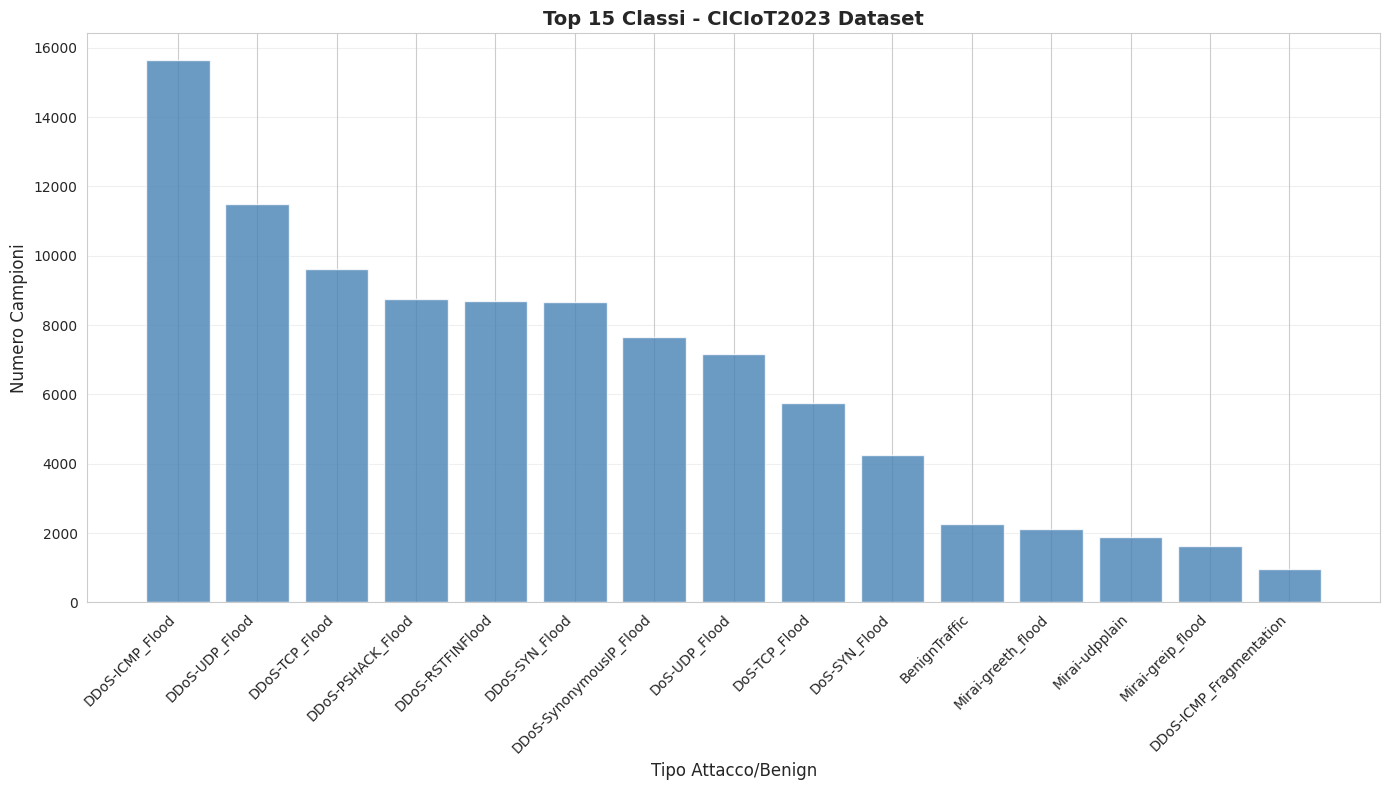


📊 Bilanciamento dataset:
   Benign:        2267 (  2.27%)
   Attack:       97733 ( 97.73%)


In [5]:
if not df.empty:
    # Assumiamo che la colonna label si chiami 'label' o simile
    # Adatta il nome se diverso
    label_col = 'label' if 'label' in df.columns else df.columns[-1]
    
    print(f"Colonna label identificata: '{label_col}'\n")
    
    # Conta classi
    label_counts = df[label_col].value_counts()
    print("Distribuzione classi:")
    print("="*80)
    print(label_counts)
    print("\n" + "="*80)
    
    # Percentuali
    print("\nDistribuzione percentuale:")
    print("="*80)
    print(label_counts / len(df) * 100)
    
    # Visualizza top 15 classi
    plt.figure(figsize=(14, 8))
    top_15 = label_counts.head(15)
    plt.bar(range(len(top_15)), top_15.values, color='steelblue', alpha=0.8)
    plt.xticks(range(len(top_15)), top_15.index, rotation=45, ha='right')
    plt.title('Top 15 Classi - CICIoT2023 Dataset', fontsize=14, fontweight='bold')
    plt.xlabel('Tipo Attacco/Benign', fontsize=12)
    plt.ylabel('Numero Campioni', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Controlla il bilanciamento
    benign_count = label_counts.get('BenignTraffic', 0)
    attack_count = len(df) - benign_count
    
    print(f"\n📊 Bilanciamento dataset:")
    print(f"   Benign:  {benign_count:>10} ({benign_count/len(df)*100:>6.2f}%)")
    print(f"   Attack:  {attack_count:>10} ({attack_count/len(df)*100:>6.2f}%)")

## 4. Classificazione Binaria: Normal vs Anomaly

Per il progetto NIDS, useremo classificazione binaria:
- **0 (Normal)**: Traffico benigno
- **1 (Anomaly)**: Qualsiasi tipo di attacco

Distribuzione binaria:
binary_label
0     2267
1    97733
Name: count, dtype: int64

Tasso di anomalie: 97.73%
Tasso di traffico normale: 2.27%


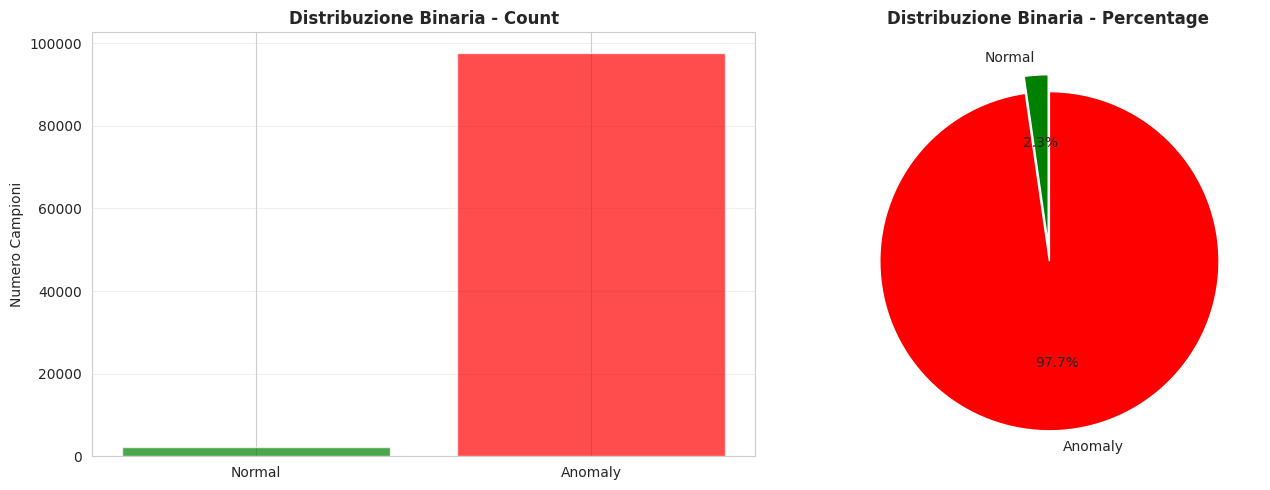

In [6]:
if not df.empty:
    # Crea etichetta binaria
    df['binary_label'] = df[label_col].apply(
        lambda x: 0 if x == 'BenignTraffic' else 1
    )
    
    print("Distribuzione binaria:")
    print("="*80)
    binary_counts = df['binary_label'].value_counts().sort_index()
    print(binary_counts)
    
    print("\n" + "="*80)
    anomaly_rate = df['binary_label'].mean()
    print(f"Tasso di anomalie: {anomaly_rate:.2%}")
    print(f"Tasso di traffico normale: {1-anomaly_rate:.2%}")
    
    # --- FIX VISUALIZZAZIONE ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Mappatura colori e labels dinamica
    labels_map = {0: 'Normal', 1: 'Anomaly'}
    colors_map = {0: 'green', 1: 'red'}
    
    # Recupera le classi effettivamente presenti nel campione
    present_classes = binary_counts.index.tolist()
    
    # Crea liste allineate con i dati presenti
    current_labels = [labels_map[cls] for cls in present_classes]
    current_colors = [colors_map[cls] for cls in present_classes]
    current_explode = [0.1 if cls == 1 else 0 for cls in present_classes] # Esplodi solo se è Anomaly
    
    # Barchart
    ax1.bar(current_labels, binary_counts.values, 
            color=current_colors, alpha=0.7)
    ax1.set_title('Distribuzione Binaria - Count', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Numero Campioni')
    ax1.grid(axis='y', alpha=0.3)
    
    # Pie chart (ora sicuro anche se c'è una sola classe)
    ax2.pie(binary_counts.values, labels=current_labels, 
            autopct='%1.1f%%', colors=current_colors, 
            startangle=90, explode=current_explode)
    ax2.set_title('Distribuzione Binaria - Percentage', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

## 5. Analisi Features Numeriche

Analizziamo le caratteristiche statistiche delle features numeriche principali.

Trovate 46 features numeriche

Analizziamo le features: ['flow_duration']

Statistiche per classe:
flow_duration                  | Normal:        38.97 | Anomaly:         5.11


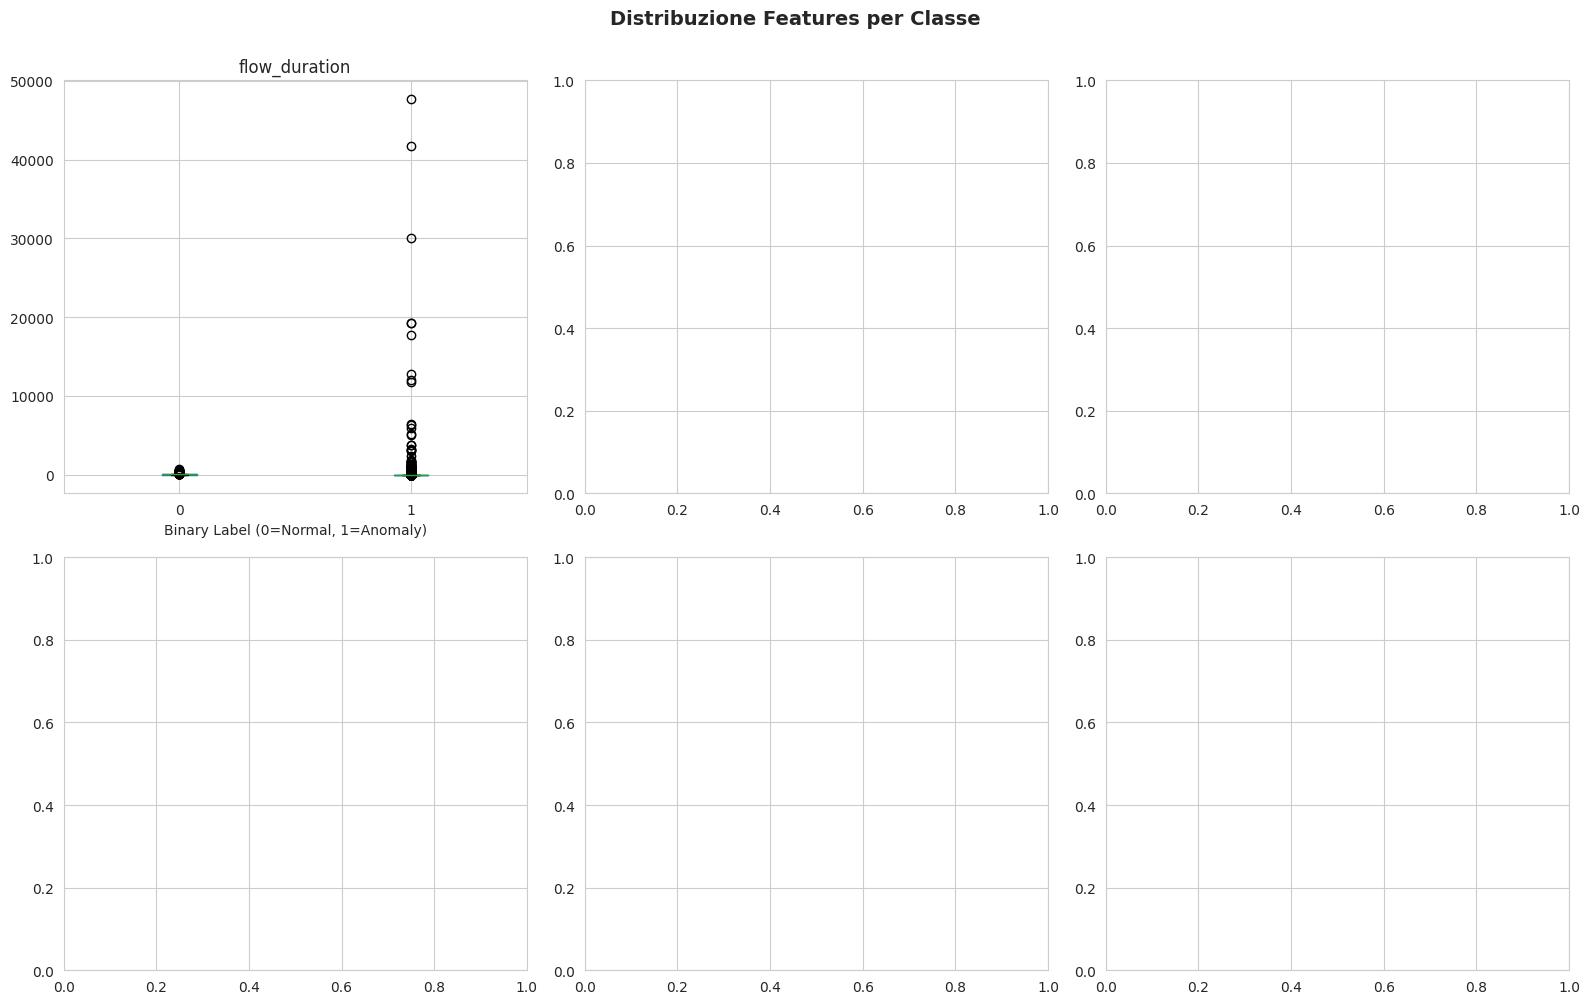

In [7]:
if not df.empty:
    # Identifica colonne numeriche (escludi label)
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if 'binary_label' in numeric_cols:
        numeric_cols.remove('binary_label')
    
    print(f"Trovate {len(numeric_cols)} features numeriche\n")
    
    # Visualizza distribuzione di alcune features chiave
    # (Adatta questi nomi in base alle colonne effettive del dataset)
    key_features = [
        'flow_duration',  # Esempio di possibile nome
        'fwd_pkts_tot',
        'bwd_pkts_tot',
        'flow_pkts_payload.avg',
        'flow_iat.mean'
    ]
    
    # Usa solo features che esistono effettivamente
    available_features = [f for f in key_features if f in df.columns]
    
    if len(available_features) == 0:
        # Se non troviamo le features previste, prendiamo le prime 5 numeriche
        available_features = numeric_cols[:5]
    
    print(f"Analizziamo le features: {available_features}\n")
    
    # Statistiche comparative Normal vs Anomaly
    print("Statistiche per classe:")
    print("="*80)
    for feature in available_features[:5]:  # Prime 5
        normal_mean = df[df['binary_label'] == 0][feature].mean()
        anomaly_mean = df[df['binary_label'] == 1][feature].mean()
        print(f"{feature:30s} | Normal: {normal_mean:>12.2f} | Anomaly: {anomaly_mean:>12.2f}")
    
    # Box plot per confronto
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    axes = axes.flatten()
    
    for idx, feature in enumerate(available_features[:6]):
        df.boxplot(column=feature, by='binary_label', ax=axes[idx])
        axes[idx].set_title(f'{feature}')
        axes[idx].set_xlabel('Binary Label (0=Normal, 1=Anomaly)')
        
    plt.suptitle('Distribuzione Features per Classe', fontsize=14, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()

## 6. Correlazione Features

Analizziamo la correlazione tra le features per identificare:
- Features ridondanti (alta correlazione)
- Features più correlate con la label

Calcolo matrice di correlazione (può richiedere tempo)...

Top 15 Features correlate con Binary Label:
Duration           0.532501
rst_count          0.484811
ack_flag_number    0.336248
Header_Length      0.315111
urg_count          0.225356
syn_count          0.107286
syn_flag_number    0.077564
rst_flag_number    0.048157
fin_flag_number    0.047005
fin_count          0.045143
psh_flag_number    0.037731
Protocol Type      0.025754
ack_count          0.024614
flow_duration      0.019390
HTTP               0.011452
Name: binary_label, dtype: float64


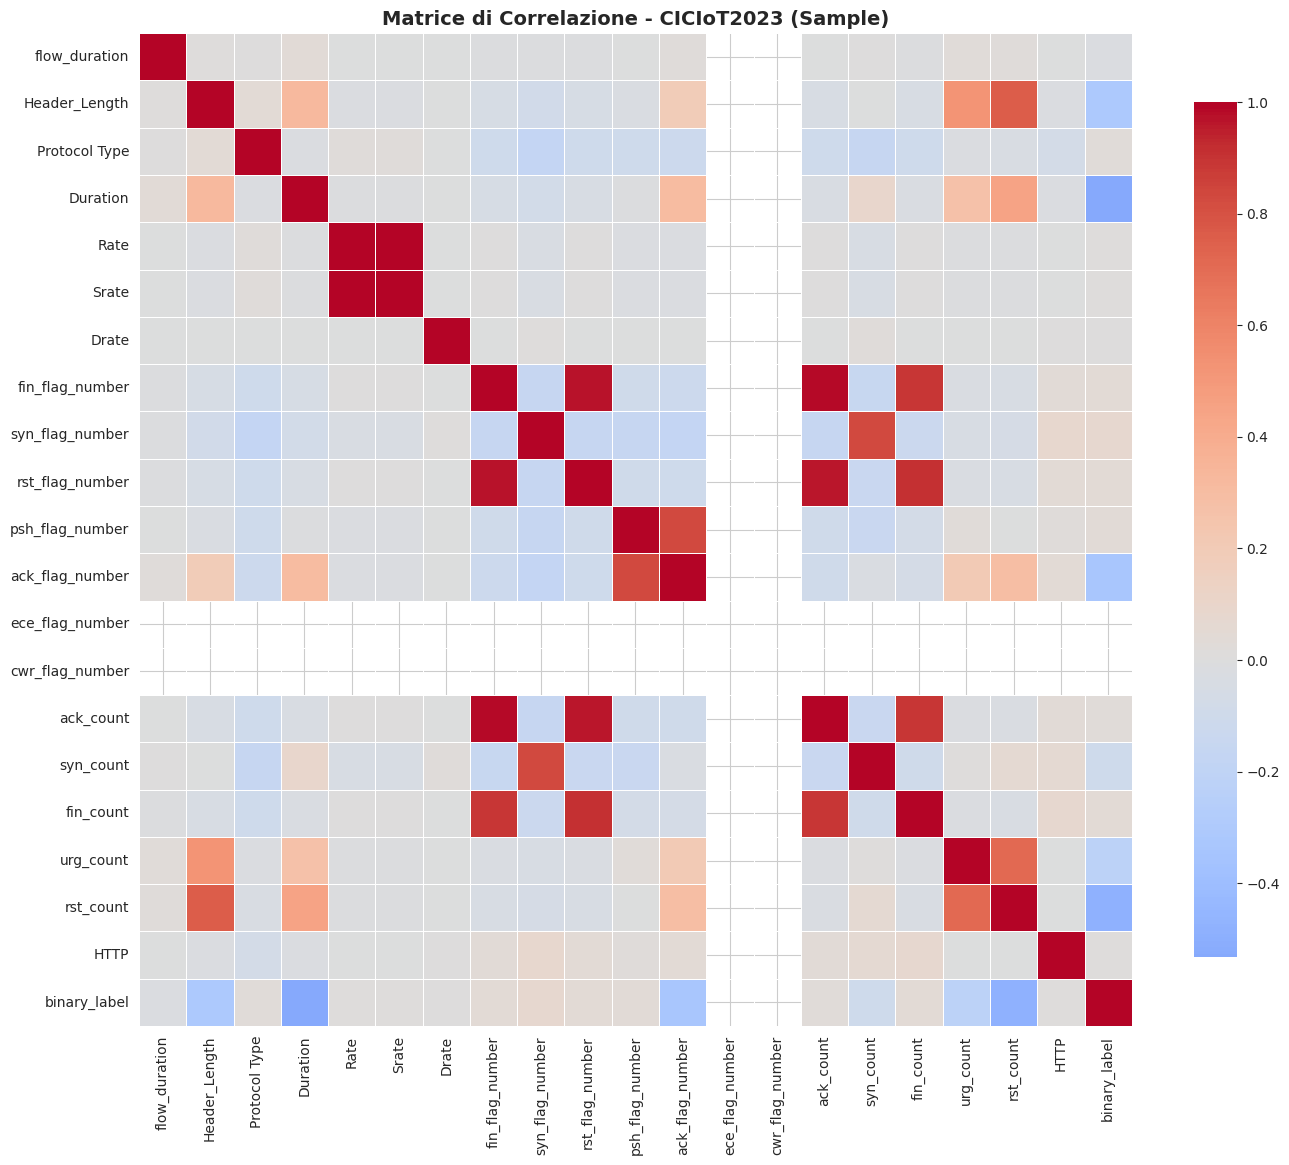


⚠️ Coppie di features altamente correlate (|r| > 0.9):
Rate                           <-> Srate                          | r = 1.000
fin_flag_number                <-> rst_flag_number                | r = 0.976
fin_flag_number                <-> ack_count                      | r = 0.987
rst_flag_number                <-> ack_count                      | r = 0.964
rst_flag_number                <-> fin_count                      | r = 0.905


In [8]:
if not df.empty:
    # Calcola matrice di correlazione (sample per velocità)
    print("Calcolo matrice di correlazione (può richiedere tempo)...")
    
    # Usa un subset di features per velocità
    corr_features = numeric_cols[:20] + ['binary_label']  # Prime 20 + label
    corr_matrix = df[corr_features].corr()
    
    # Correlazione con la label
    print("\nTop 15 Features correlate con Binary Label:")
    print("="*80)
    label_corr = corr_matrix['binary_label'].abs().sort_values(ascending=False)
    print(label_corr.head(16)[1:])  # Escludi correlazione con se stessa
    
    # Heatmap correlazione
    plt.figure(figsize=(14, 12))
    sns.heatmap(corr_matrix, 
                cmap='coolwarm', 
                center=0,
                square=True,
                linewidths=0.5,
                cbar_kws={"shrink": 0.8})
    plt.title('Matrice di Correlazione - CICIoT2023 (Sample)', 
              fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Identifica features altamente correlate (potenziali candidati per feature selection)
    print("\n⚠️ Coppie di features altamente correlate (|r| > 0.9):")
    print("="*80)
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.9:
                high_corr_pairs.append((
                    corr_matrix.columns[i], 
                    corr_matrix.columns[j], 
                    corr_matrix.iloc[i, j]
                ))
    
    if high_corr_pairs:
        for feat1, feat2, corr_val in high_corr_pairs[:10]:  # Prime 10
            print(f"{feat1:30s} <-> {feat2:30s} | r = {corr_val:.3f}")
    else:
        print("Nessuna coppia trovata nel sample analizzato.")

## 📋 Conclusioni Data Exploration

### Dataset CICIoT2023 - Key Findings:

1. **Volume**: ~46M record completi (sample usato per esplorazione)
2. **Features**: 46 features numeriche estratte da flussi di rete IoT
3. **Labels**: 33 tipi di attacco + traffico Benign
4. **Bilanciamento**: [verificare dalla distribuzione sopra]
5. **Qualità**: Dataset moderno (2023), rappresentativo di minacce IoT reali

### Prossimi Step:

1. ✅ Esplorazione completata
2. ⏭️ **Preprocessing**: 
   - Gestione valori mancanti/infiniti
   - Normalizzazione features
   - Encoding labels (binary: 0=Normal, 1=Anomaly)
   - Train/Test split
3. ⏭️ **Feature Engineering**:
   - Feature selection (rimozione features ridondanti)
   - Gestione outliers
4. ⏭️ **Model Training**:
   - Decision Tree (baseline)
   - Random Forest (modello principale)
   - k-NN
   - SVM

### 💡 Note per il Team:

- Il dataset è **molto grande** (~13GB non compresso)
- Considerare uso di **chunking** o **sampling** per training iniziale
- Le features sono già estratte (flow-based), non serve analisi PCAP
- Focus su **bilanciamento classi** (usare SMOTE se necessario)
- Target: **Accuracy >95%, Precision >90%, Recall >95%**

In [9]:
# Salva informazioni dataset per riferimento
if not df.empty:
    dataset_info = {
        'total_samples': len(df),
        'num_features': len(numeric_cols),
        'num_classes': df[label_col].nunique(),
        'anomaly_rate': df['binary_label'].mean(),
        'memory_mb': df.memory_usage(deep=True).sum() / 1024**2
    }
    
    print("\n" + "="*80)
    print("DATASET SUMMARY")
    print("="*80)
    for key, value in dataset_info.items():
        print(f"{key:20s}: {value}")
    print("="*80)


DATASET SUMMARY
total_samples       : 100000
num_features        : 46
num_classes         : 34
anomaly_rate        : 0.97733
memory_mb           : 42.002197265625
